# Metrics and regression evaluation

## Metrics 

The `sklarn.metrics` module includes metrics to evaluate regression models. Metric functions ending in `loss` or `error` should be minimized. Functions ending in `score` should be maximized. 

The `coefficient of determination` $(r_{2})$ is a common regression metric. This value is typically between 0 and 1. It represents the percent of the variance of the target that the features contribute. Higher values are better, but in general it is difficult to evaluate the model from this metric alone. 

The $r^2$ is the default metric used during grid search. You can specify other metrics using the `scoring` parameter 

In [1]:
import pandas as pd 
from sklearn.datasets import load_boston 
from sklearn import (model_selection, preprocessing)

In [2]:
b = load_boston()
bos_X = pd.DataFrame(b.data, columns = b.feature_names)
bos_y = b.target

In [3]:
bos_X_train, bos_X_test, bos_y_train, bos_y_test = model_selection.train_test_split(bos_X, bos_y, test_size=0.3, random_state=42)

In [4]:
bos_sX = preprocessing.StandardScaler().fit_transform(bos_X) #scaling the dataset 
bos_sX_train, bos_sX_test, bos_sy_train, bos_sy_test = model_selection.train_test_split(bos_sX, bos_y, test_size=0.3, random_state=42)

In [5]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(random_state = 42, n_estimators = 100)
rfr.fit(bos_X_train, bos_y_train)
RandomForestRegressor(bootstrap = True, criterion = 'mse', max_depth = None, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0,
                     min_impurity_split=None, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs = 1, oob_score=False, random_state=42, verbose = 0, warm_start=False)
rfr.score(bos_X_test, bos_y_test)
# the same can be obtain by importing metrics from sklearn and call metrics.r2_score(y_test, y_test_pred)

0.8708997131330258

In [6]:
y_pred = rfr.predict(bos_X_test)

In [7]:
from sklearn import metrics 

metrics.r2_score(bos_y_test, y_pred)

0.8708997131330258

__Note__: There is also an _explained variance metric_. If the mean of the residuals is 0, then the variance explained is the same as the coefficient of determination. 

_Mean absolute error_ (`neg_mean_absolute_error` when used in grid search) express the average absolute model prediction error. A perfect model would score 0, but this metric has no upper bounds, unlike the coefficient of determination. However, since it is in units of the target, it is more interpretable. If you want to ignore outliers, this is a good metric to use. 
This measure cannot indicate how bad a model is, but can be used to compare two models. If you have two models, the model with a lower score is better. 

This number tells us that the average error is about two above or belowe the real value :

In [8]:
metrics.mean_absolute_error(bos_y_test, y_pred)

2.083605263157894

_Root mean squared error_ (`neg_mean_squared_error`) also measures models error in terms of the target. However, because it averages the sqaure errors before talking the square root, it penalizes large errors. If you want to penalize large errors, this is a good metric to use. For example, if being off by eight is more than two times worse than being off by four. 


As with mean absolute error, this measure cannot indicate how bad a model is, but can be used to compare tow models. If you assume that errors are normally distirbuted, this is a good choice

In [9]:
metrics.mean_squared_error(bos_y_test, y_pred)

9.619662013157892

The _mean squared logaritmic error_ penalizes underprediction more than overprediction. If you have targets that experience exponential growth (population, stock, etc.), this is a good metric. 

In [10]:
metrics.mean_squared_log_error(bos_y_test, y_pred)

0.02128735507001923

## Residuals plot 

Good models with appropriate $R^2$ scores will exhibit _homoscedasticity_. This means the variance is the same for all values of targets regardless of the input. Plotted this looks like randomly distributed values in a residual plot. If there are patterns, the odel or the data are problematic. 

Residuals plot also show outliers, which can have a big impact on model fitting 

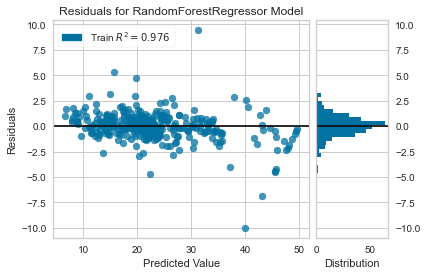

<AxesSubplot:title={'center':'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [12]:
import matplotlib.pyplot as plt
from yellowbrick.regressor import ResidualsPlot


fig, ax = plt.subplots(figsize = (6,4))
rpv = ResidualsPlot(rfr)
rpv.fit(bos_X_train, bos_y_train)
rpv.poof()

## Heteroscedasticity 

The statsmodel library includes the _Breusch-Pagan test_ for heteroscedasticity. This means that variance of the residuals varies over the predicted values. In the Bresuch-Pagan test, if the p-values are significant ( p-values less than 0.05), the null hypothesis of homoscedasticity is rejected. This indicates that residuals are heteroscedastic, and the prediction are biased.  

In [18]:
import statsmodels.api as sm
import numpy as np 

In [19]:
df = pd.DataFrame({'rating': [90, 85, 82, 88, 94, 90, 76, 75, 87, 86],
                   'points': [25, 20, 14, 16, 27, 20, 12, 15, 14, 19],
                   'assists': [5, 7, 7, 8, 5, 7, 6, 9, 9, 5],
                   'rebounds': [11, 8, 10, 6, 6, 9, 6, 10, 10, 7]})

In [20]:
df

,rating,points,assists,rebounds
0,90,25,5,11
1,85,20,7,8
2,82,14,7,10
3,88,16,8,6
4,94,27,5,6
5,90,20,7,9
6,76,12,6,6
7,75,15,9,10
8,87,14,9,10
9,86,19,5,7


In [21]:
import statsmodels.formula.api as smf

#fit regression model
fit = smf.ols('rating ~ points+assists+rebounds', data=df).fit()

#view model summary
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                     3.299
Date:                Mon, 18 Oct 2021   Prob (F-statistic):             0.0995
Time:                        12:20:46   Log-Likelihood:                -26.862
No. Observations:                  10   AIC:                             61.72
Df Residuals:                       6   BIC:                             62.93
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     62.4716     14.588      4.282      0.0

C:\Users\alber\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [24]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

#perform Bresuch-Pagan test
names = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(fit.resid, fit.model.exog)

lzip(names, test)

for name, num in zip(names, test):
    print(f'{name:10}{num:10.3f}')

Lagrange multiplier statistic     6.004
p-value        0.111
f-value        3.005
f p-value      0.117


## Normal residuals 

The scipy labrary includes a _probability plot_ and the _Kolmogorov-Smirnov_ test, both of which measures whether the residuals are normal. 

We can plot a histogram to visualize the residuals and check for normality

<AxesSubplot:title={'center':'Residual Histogram'}, ylabel='Frequency'>

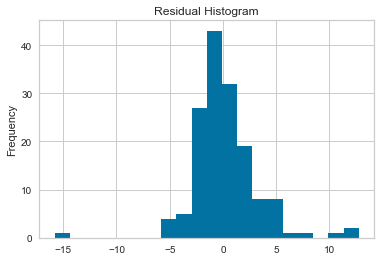

In [26]:
fig,ax = plt.subplots(figsize = (6,4))
resids = bos_y_test - rfr.predict(bos_X_test)
pd.Series(resids, name = 'residuals').plot.hist(bins = 20, ax = ax, title = 'Residual Histogram')

The above shows a probability ploy. If the samples plotted againts the quantiles line up, the residuals are normal. We can see that this fails in this case:

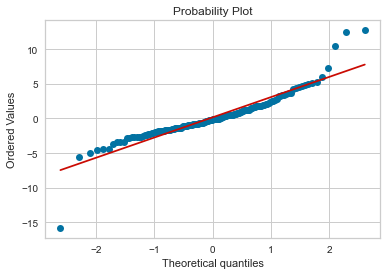

In [29]:
from scipy import stats 

fig,ax = plt.subplots(figsize = (6,4))
_ = stats.probplot(resids, plot = ax)


The Kolmogorov-Smirnov test can evaluate whether a distribution is normal. If the p-value is significant (<0.05), then the values are not normal. 

In [30]:
stats.kstest(resids, cdf = 'norm')
    

KstestResult(statistic=0.2030324289045929, pvalue=5.705755737845543e-06)

This fails as well, which tells us the residuals are not normal.

## Prediction Error Plot

A prediction error plot shows the real targets againts the predicted values. For a perfect model these points would line up in a 45-degree line. 

As our model seems to predict lower values for  the high  end of y, the model has some performance issues. This is also evident in the residuals plot. 

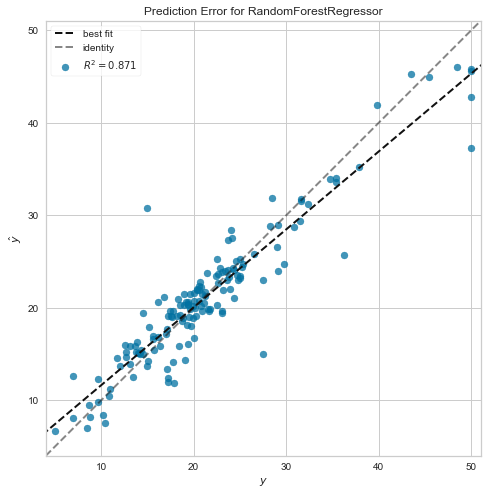

<AxesSubplot:title={'center':'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [32]:
from yellowbrick.regressor import PredictionError

fig, ax = plt.subplots(figsize = (10,8))
pev = PredictionError(rfr)
pev.fit(bos_X_train, bos_y_train)
pev.score(bos_X_test, bos_y_test)
pev.poof()